### Imports

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import pandas 
import plotly as py
import plotly.graph_objs as go
from plotly import tools
from matplotlib.pyplot import figure


### Data Preparation

In [3]:
# data = pandas.read_csv('./data/Learning/Training_set_new.csv')
# test = pandas.read_csv('./data/Learning/Test_set.csv')

data = pandas.read_csv('./data/Learning/last version/Train_Set.csv')
test = pandas.read_csv('./data/Learning/last version/Test_Set.csv')
gtTrain = pandas.read_csv('./data/21/groundTruthEdited.csv')
gtTest = pandas.read_csv('./data/17/groundTruthEdited.csv')

x_train_set = data[['x','y','z']]

target = data['brakingStatus']
# xtrain_set = [data[['x','y','z']][i:i+1].iterrows() for i in range(0,train_set)]
# target = [data['brakingStatus'][i:i+1] for i in range(0,train_set)]

x_test_set = test[['x','y','z']]
y_test_set = test['brakingStatus']

data[['brakingStatus']][19983:20000]

,brakingStatus
19983,1
19984,1
19985,1
19986,0
19987,0
19988,0
19989,0
19990,0
19991,0
19992,0


In [4]:
x_train_set = np.array(x_train_set,dtype=float)
target = np.array(target,dtype=float)

x_test_set =  np.array(x_test_set,dtype=float)
y_test_set =  np.array(y_test_set,dtype=float)

In [5]:
x_train_set_array= []
for i in x_train_set:
    x_train_set_array.append([i])
x_train_set_array = np.array(x_train_set_array, dtype = float)

x_test_set_array= []
for i in x_test_set:
    x_test_set_array.append([i])
x_test_set_array = np.array(x_test_set_array, dtype = float)

y_test_set_array= []
for i in y_test_set:
    y_test_set_array.append([i])
y_test_set_array = np.array(y_test_set_array, dtype = float)

target_array= []      
for i in target:
    target_array.append([i])
target_array = np.array(target_array, dtype = float)




In [6]:
x_train_set_array_reshape = np.squeeze(x_train_set_array, axis = 1)
target_array_reshape = np.squeeze(target_array, axis = 1)
x_test_set_array_reshape = np.squeeze(x_test_set_array, axis=1)
y_test_set_array_reshape = np.squeeze(y_test_set_array, axis=1)

In [17]:
len(x_test_set_array)
# len(x_train_set_array_reshape)

10677

### RNN model

In [8]:
model = Sequential()

In [9]:
model.add(LSTM(1,batch_input_shape= (None,10,3),return_sequences= False))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#model.add(Softmax())
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit( 
    np.array([x_train_set_array_reshape[i:i+10] for i in range(0,50600)]),
    np.array([target_array_reshape[i+9] for i in range(0,50600)]),
    epochs=100,
    validation_data=(np.array([x_train_set_array_reshape[i:i+10] for i in range(50601,51050)]),np.array([target_array_reshape[i+9] for i in range(50601,51050)])),
    batch_size=128)
# history = model.fit(
#     x_train_set_array[5000:5010],target_array[5000:5010],epochs=100,
#     validation_data=(x_train_set_array[18500:20000],target_array[18500:20000]),
#     batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 50600 samples, validate on 449 samples
Epoch 1/100
50600/50600 [==============================] - 7s 135us/step - loss: 0.1852 - acc: 0.8747 - val_loss: 0.0820 - val_acc: 1.0000
Epoch 2/100
50600/50600 [==============================] - 3s 69us/step - loss: 0.0601 - acc: 0.9689 - val_loss: 0.0234 - val_acc: 1.0000
Epoch 3/100
50600/50600 [==============================] - 3s 67us/step - loss: 0.0371 - acc: 0.9707 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 4/100
50600/50600 [==============================] - 3s 69us/step - loss: 0.0305 - acc: 0.9718 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 5/100
50600/50600 [==============================] - 4s 71us/step - loss: 0.0283 - acc: 0.9722 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 6/100
50600/50600 [==============================] - 3s 65us/step - loss: 0.0271 - acc: 0.9725 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 7/100
50600/50600 [==============================] - 3s 64us/step - l

50600/50600 [==============================] - 3s 61us/step - loss: 0.0219 - acc: 0.9714 - val_loss: 5.0396e-04 - val_acc: 1.0000
Epoch 57/100
50600/50600 [==============================] - 3s 61us/step - loss: 0.0219 - acc: 0.9716 - val_loss: 4.5750e-04 - val_acc: 1.0000
Epoch 58/100
50600/50600 [==============================] - 3s 57us/step - loss: 0.0219 - acc: 0.9714 - val_loss: 4.7457e-04 - val_acc: 1.0000
Epoch 59/100
50600/50600 [==============================] - 3s 58us/step - loss: 0.0219 - acc: 0.9714 - val_loss: 5.5876e-04 - val_acc: 1.0000
Epoch 60/100
50600/50600 [==============================] - 3s 61us/step - loss: 0.0219 - acc: 0.9716 - val_loss: 5.4229e-04 - val_acc: 1.0000
Epoch 61/100
50600/50600 [==============================] - 3s 58us/step - loss: 0.0219 - acc: 0.9717 - val_loss: 5.7081e-04 - val_acc: 1.0000
Epoch 62/100
50600/50600 [==============================] - 3s 58us/step - loss: 0.0219 - acc: 0.9716 - val_loss: 5.4400e-04 - val_acc: 1.0000
Epoch 63/100

In [76]:
[x_train_set_array[i:i+10] for i in range(1,100)]

[array([[[ 2.02217755, -0.12587721,  0.14135243]],
 
        [[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.71053093]]]),
 array([[[ 0.77763394, -0.08864197,  2.00268872]],
 
        [[-0.69554217, -0.12786201, -1.13422993]],
 
        [[-1.86422014,  0.84331071, -1.78310265]],
 
        [[-0.25028119,  0.02468984, -0.30771547]],
 
        [[ 0.98519874, -0.53148717,  0.98553079]],
 
        [[ 0.25053499, -0.31494175, -0.2151497 ]],
 
        [[-1.30261753,  0.58909205, -1.11933019]],
 
        [[-0.75789308,  0.37743167, -0.48275053]],
 
        [[ 0.40023665, -0.46864504,  0.7105309

In [16]:
results = model.predict(np.array([x_test_set_array_reshape[i:i+10] for i in range(0,len(x_test_set_array)-10)]))

In [27]:
thresholded_result = []
for i in range(len(results)):
    if(results[i]<0.5):
        thresholded_result.append(0)
    else:
        thresholded_result.append(1)

df = pandas.DataFrame(data=thresholded_result,columns=['brakingStatus'])
df.to_csv('./data/Learning/results.csv',index= False)

In [41]:
thresholded_result = []
for i in range(len(results)):
    if(results[i]<0.8):
        thresholded_result.append(0)
    else:
        thresholded_result.append(1)
        
len(thresholded_result)

10667

In [80]:
result_reshaped = []
for i in range(len(results)):
    result_reshaped.append(results[i][0])



In [82]:

fig =tools.make_subplots(rows=1,cols=1)


# th_result =  go.Scatter(
#     x = list(range(0,10677)),
#     y = thresholded_result,
#     mode = 'lines',
#     name='model_result'
# )

result =  go.Scatter(
    x = list(range(0,10677)),
    y = result_reshaped,
    mode = 'lines',
    name='model_result'
)

test =  go.Scatter(
    x = list(range(0,10677)),
    y = y_test_set_array_reshape,
    mode = 'lines',
    name='test'
)
# fig.append_trace(th_result,1,1)
fig.append_trace(result,1,1)
fig.append_trace(test,1,1)


fig['layout'].update(height=500, title = 'Braking Model Prediction')


py.offline.plot(fig, filename='multiple-axes-double')


'multiple-axes-double.html'

<function matplotlib.pyplot.show(*args, **kw)>

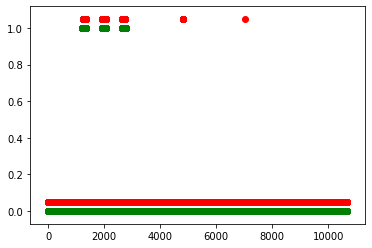

In [30]:
len(results)

# plt.scatter(range(10667),results,c='r')
# plt.scatter(range(10667),y_test_set_array_reshape[:10667],c='g')
# plt.show
plt.scatter(range(10667),thresholded_result,c='r')
plt.scatter(range(10667),y_test_set_array_reshape[:10667],c='g')
plt.show

# plt.scatter(range(310),results[8300:8610],c='r')
# plt.scatter(range(310),y_test_set_array_reshape[8300:8610],c='g')
# plt.show
# plt.scatter(range(310),thresholded_result[8300:8610],c='r')
# plt.scatter(range(310),y_test_set_array_reshape[8300:8610],c='g')


# plt.scatter(range(100),thresholded_result[8450:8550],c='r')


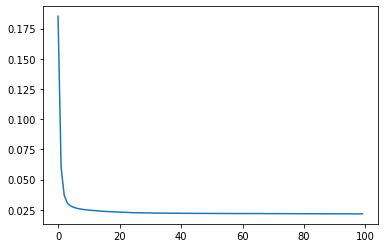

In [22]:
plt.plot(history.history['loss'])
plt.show()

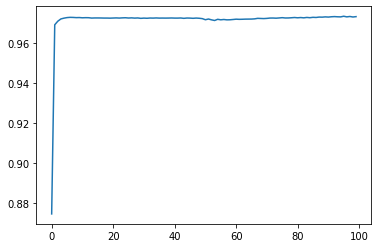

In [23]:
plt.plot(history.history['acc'])
plt.show()

### Training by just 'X' 

In [44]:
x_train_set_X = data['x']
x_test_set_X = test['x']


x_train_set_X = np.array(x_train_set_X,dtype= float)
x_test_set_X = np.array(x_test_set_X,dtype= float)


In [45]:
x_train_set_array_X= []      
for i in x_train_set:
    x_train_set_array_X.append([i])
x_train_set_array_X = np.array(x_train_set_array_X, dtype = float)

x_test_set_array_X= []      
for i in x_test_set:
    x_test_set_array_X.append([i])
x_test_set_array_X = np.array(x_test_set_array_X, dtype = float)

In [46]:
model_X = Sequential()

In [47]:
model_X.add(LSTM(1,batch_input_shape= (None,1,3),return_sequences= False))

In [49]:
model_X.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [50]:
model_X.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
